## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [58]:
import pandas as pd

In [59]:
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [60]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [62]:
X = heart[["age", "chol"]]
y = heart["diagnosis"]

In [63]:
logit = LogisticRegression()
logit.fit(X, y)

LogisticRegression()

In [64]:
b0 = logit.intercept_[0]
b1, b2 = logit.coef_[0]
print("Intercept:", b0)
print("age coefficient:", b1)
print("chol coefficient:", b2)

Intercept: -3.240112258859206
age coefficient: 0.04686330613037214
chol coefficient: 0.0018012385190290258


In [65]:
age = 55
chol_cutoff = -(b0 + b1*age)/b2
print("cholestorol cutoff:",chol_cutoff)

cholestorol cutoff: 367.8748897985677


In [66]:
log_odds_target = np.log(0.9/0.1)
chol_90 = -(b0 + b1*age - log_odds_target)/b2
print("to estimate 90% heart disease, cholesterol:", chol_90)

to estimate 90% heart disease, cholesterol: 1587.715879275438


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

In [68]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [69]:
b1, b2 = lda.coef_[0]
b0 = lda.intercept_[0]

print("Intercept:", b0)
print("age coefficient:", b1)
print("chol coefficient:", b2)

Intercept: -3.2196776604068784
age coefficient: 0.04655743553694484
chol coefficient: 0.0017896671039291314


In [70]:
age = 55
chol_cutoff_lda = -(b0 + b1*age)/b2
print("to prevent heart diseease, cholesterol:", chol_cutoff_lda)

to prevent heart diseease, cholesterol: 368.235357529938


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [72]:
svc = SVC(kernel="linear")

In [73]:
svc.fit(X, y)

SVC(kernel='linear')

In [74]:
print("Intercept:", svc.intercept_)
print("Coefficients:", svc.coef_)

Intercept: [-4.68603406]
Coefficients: [[0.06439772 0.00365896]]


In [75]:
w0 = -4.68603406
w1 = 0.06439772
w2 = 0.00365896

age = 55

chol_cutoff = -(w0 + w1 * age) / w2
print("cholestorol cutoff should be:", chol_cutoff)


cholestorol cutoff should be: 312.70072916894406


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [76]:
heart["diagnosis"] = heart["diagnosis"].map({'No Disease': 0, 'Disease': 1})
heart

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,0
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,1
2,Miles Wolf,62,0,3,130,263,1,97,0
3,Mikaila Block,43,1,1,115,303,1,181,1
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,1
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,0
200,Mr. Foster Zieme,51,1,3,94,227,1,154,1
201,Lashanda Hagenes,42,1,2,120,295,1,162,1
202,Levern Trantow III,35,0,1,138,183,1,182,1


In [77]:
ages = np.linspace(heart["age"].min(), heart["age"].max(), 100)

logit_line = -(b0 + b1*ages)/b2
lda_line   = -(lda.intercept_[0] + lda.coef_[0,0]*ages)/lda.coef_[0,1]
svc_line   = -(svc.intercept_[0] + svc.coef_[0,0]*ages)/svc.coef_[0,1]


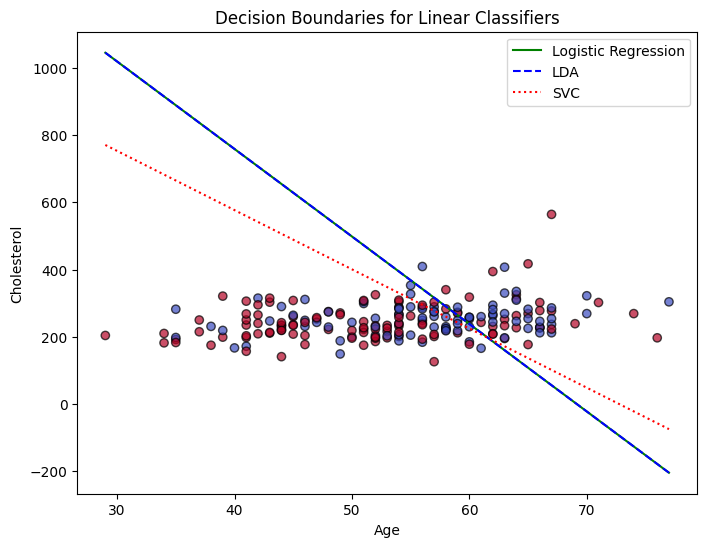

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(heart["age"], heart["chol"], c=heart["diagnosis"], cmap="coolwarm", edgecolor="k", alpha=0.7)

plt.plot(ages, logit_line, color="green", label="Logistic Regression")
plt.plot(ages, lda_line, color="blue", linestyle="--", label="LDA")
plt.plot(ages, svc_line, color="red", linestyle=":", label="SVC")

plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundaries for Linear Classifiers")
plt.legend()
plt.show()